<a href="https://colab.research.google.com/github/Romit-Ghosh/Machine-Learning-/blob/main/ML%20Parctical%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
file_path = '/content/heart - heart.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)

# **UNIBVARIATE ANALYSIS**

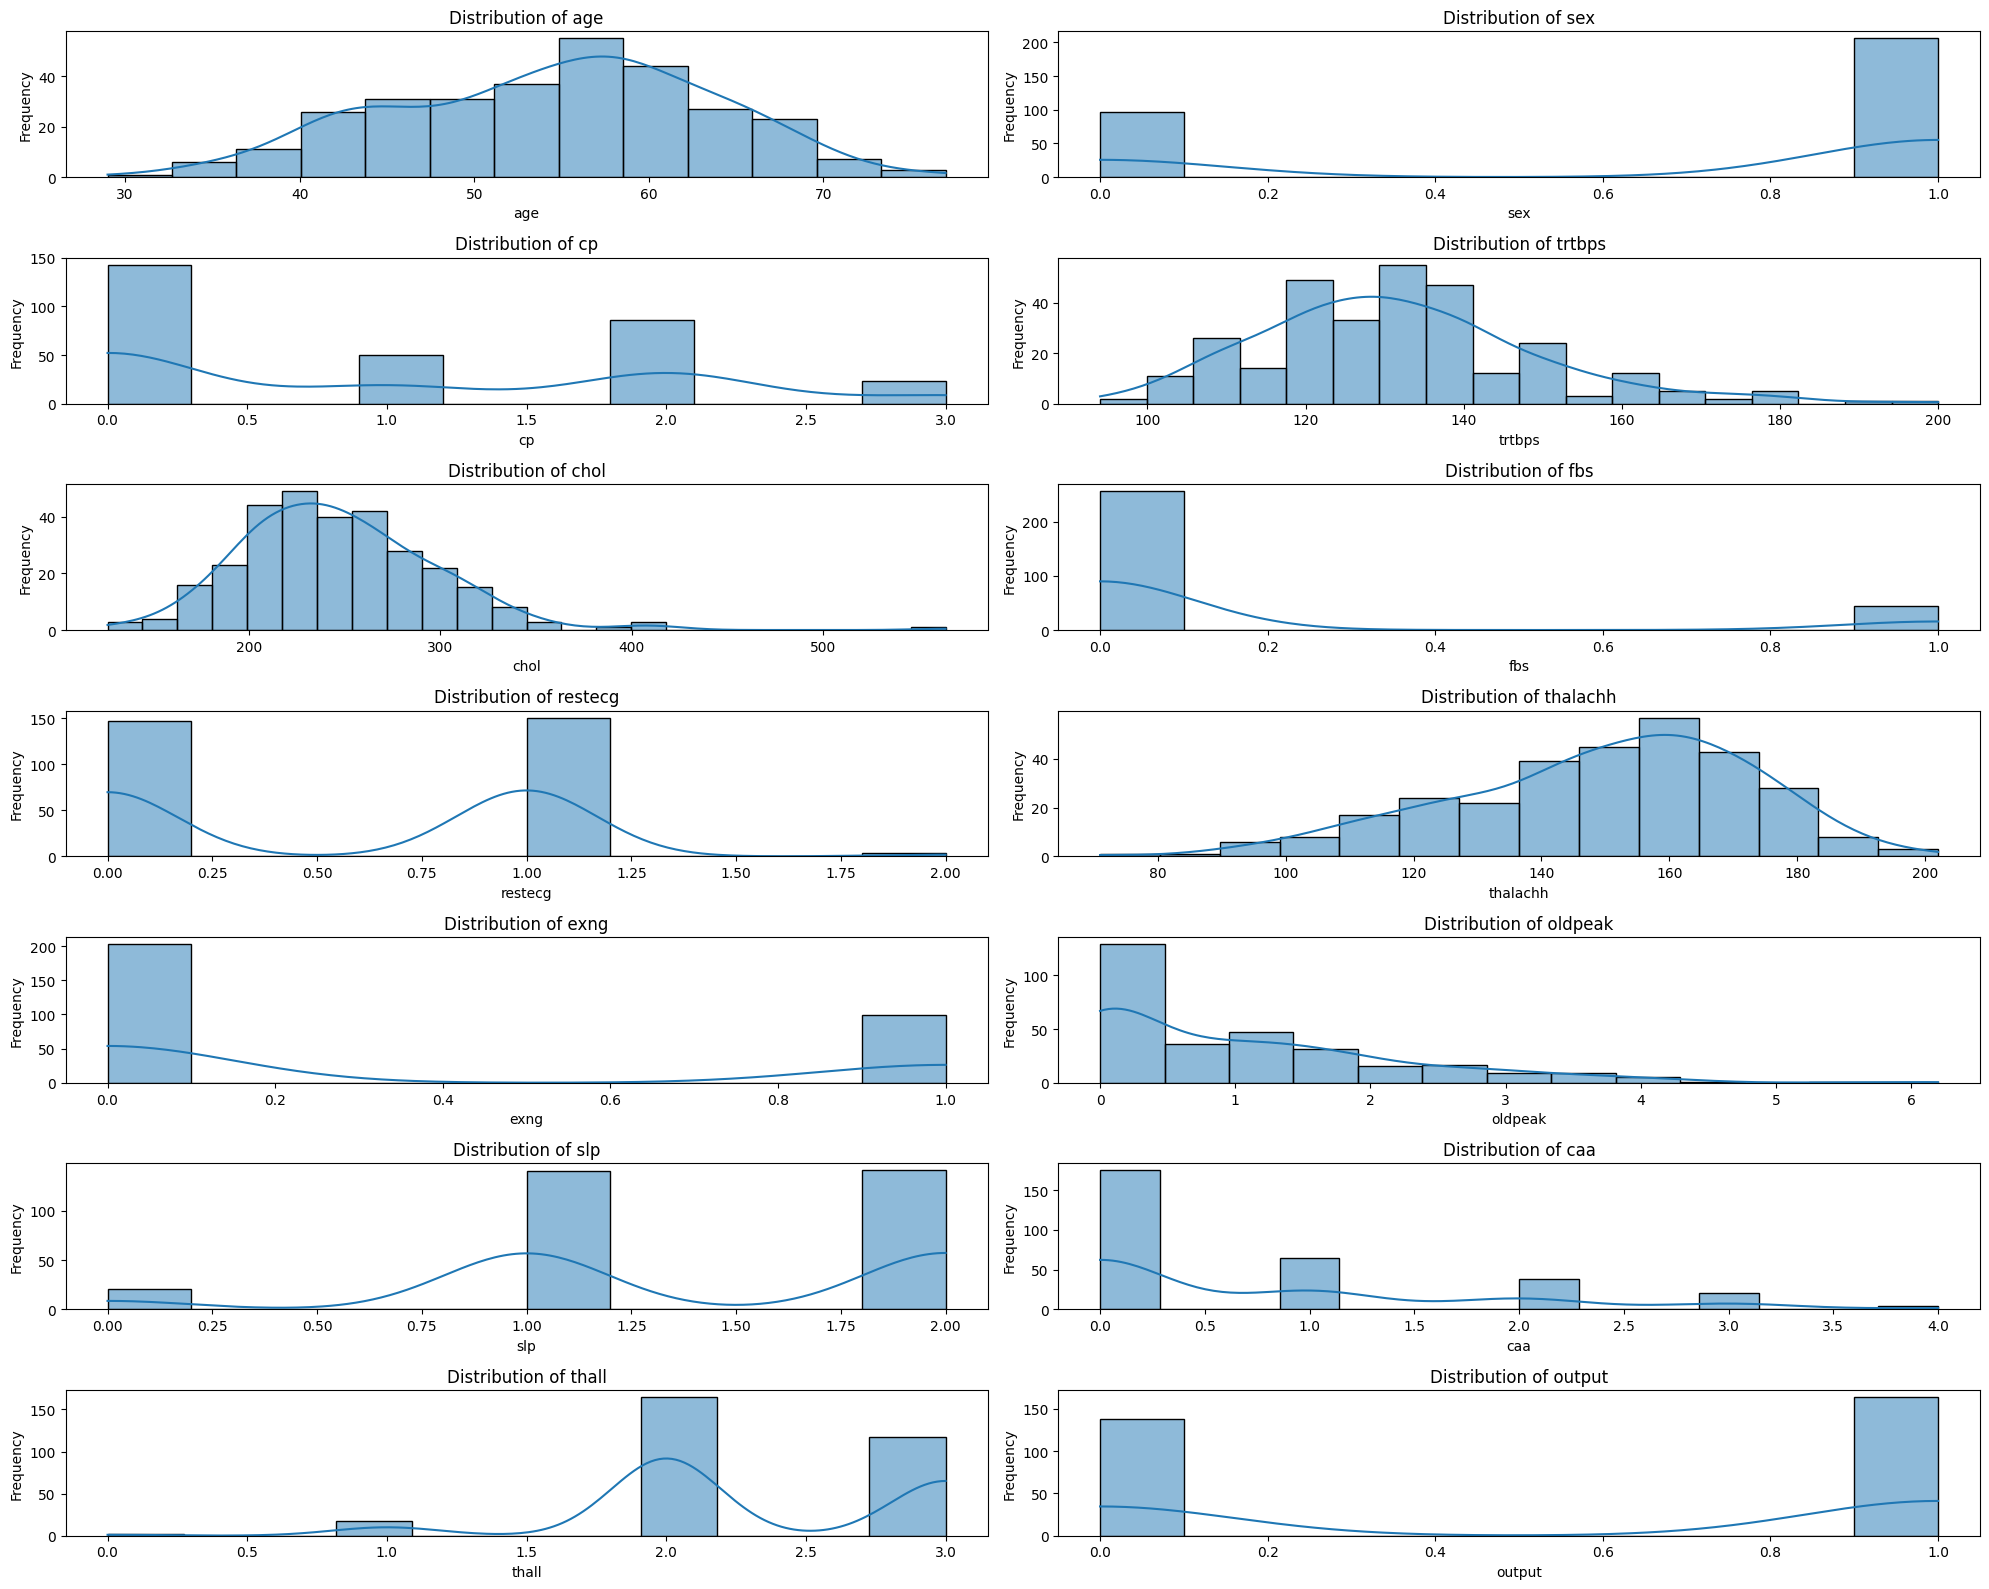

In [18]:
plt.figure(figsize=(20,16))

for i, col in enumerate(df.columns):
  plt.subplot(7,2,i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Output (Heart Attack: 1 = Yes, 0 = No)')

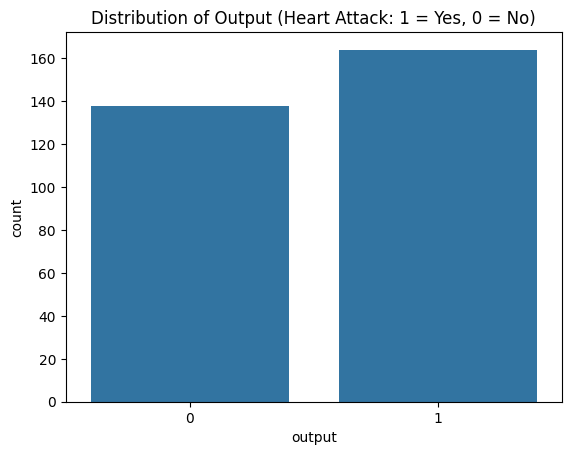

In [19]:
sns.countplot(data=df,x='output')
plt.title('Distribution of Output (Heart Attack: 1 = Yes, 0 = No)')

# **BIVARIATE/MULTIVARIATE ANALYSIS**

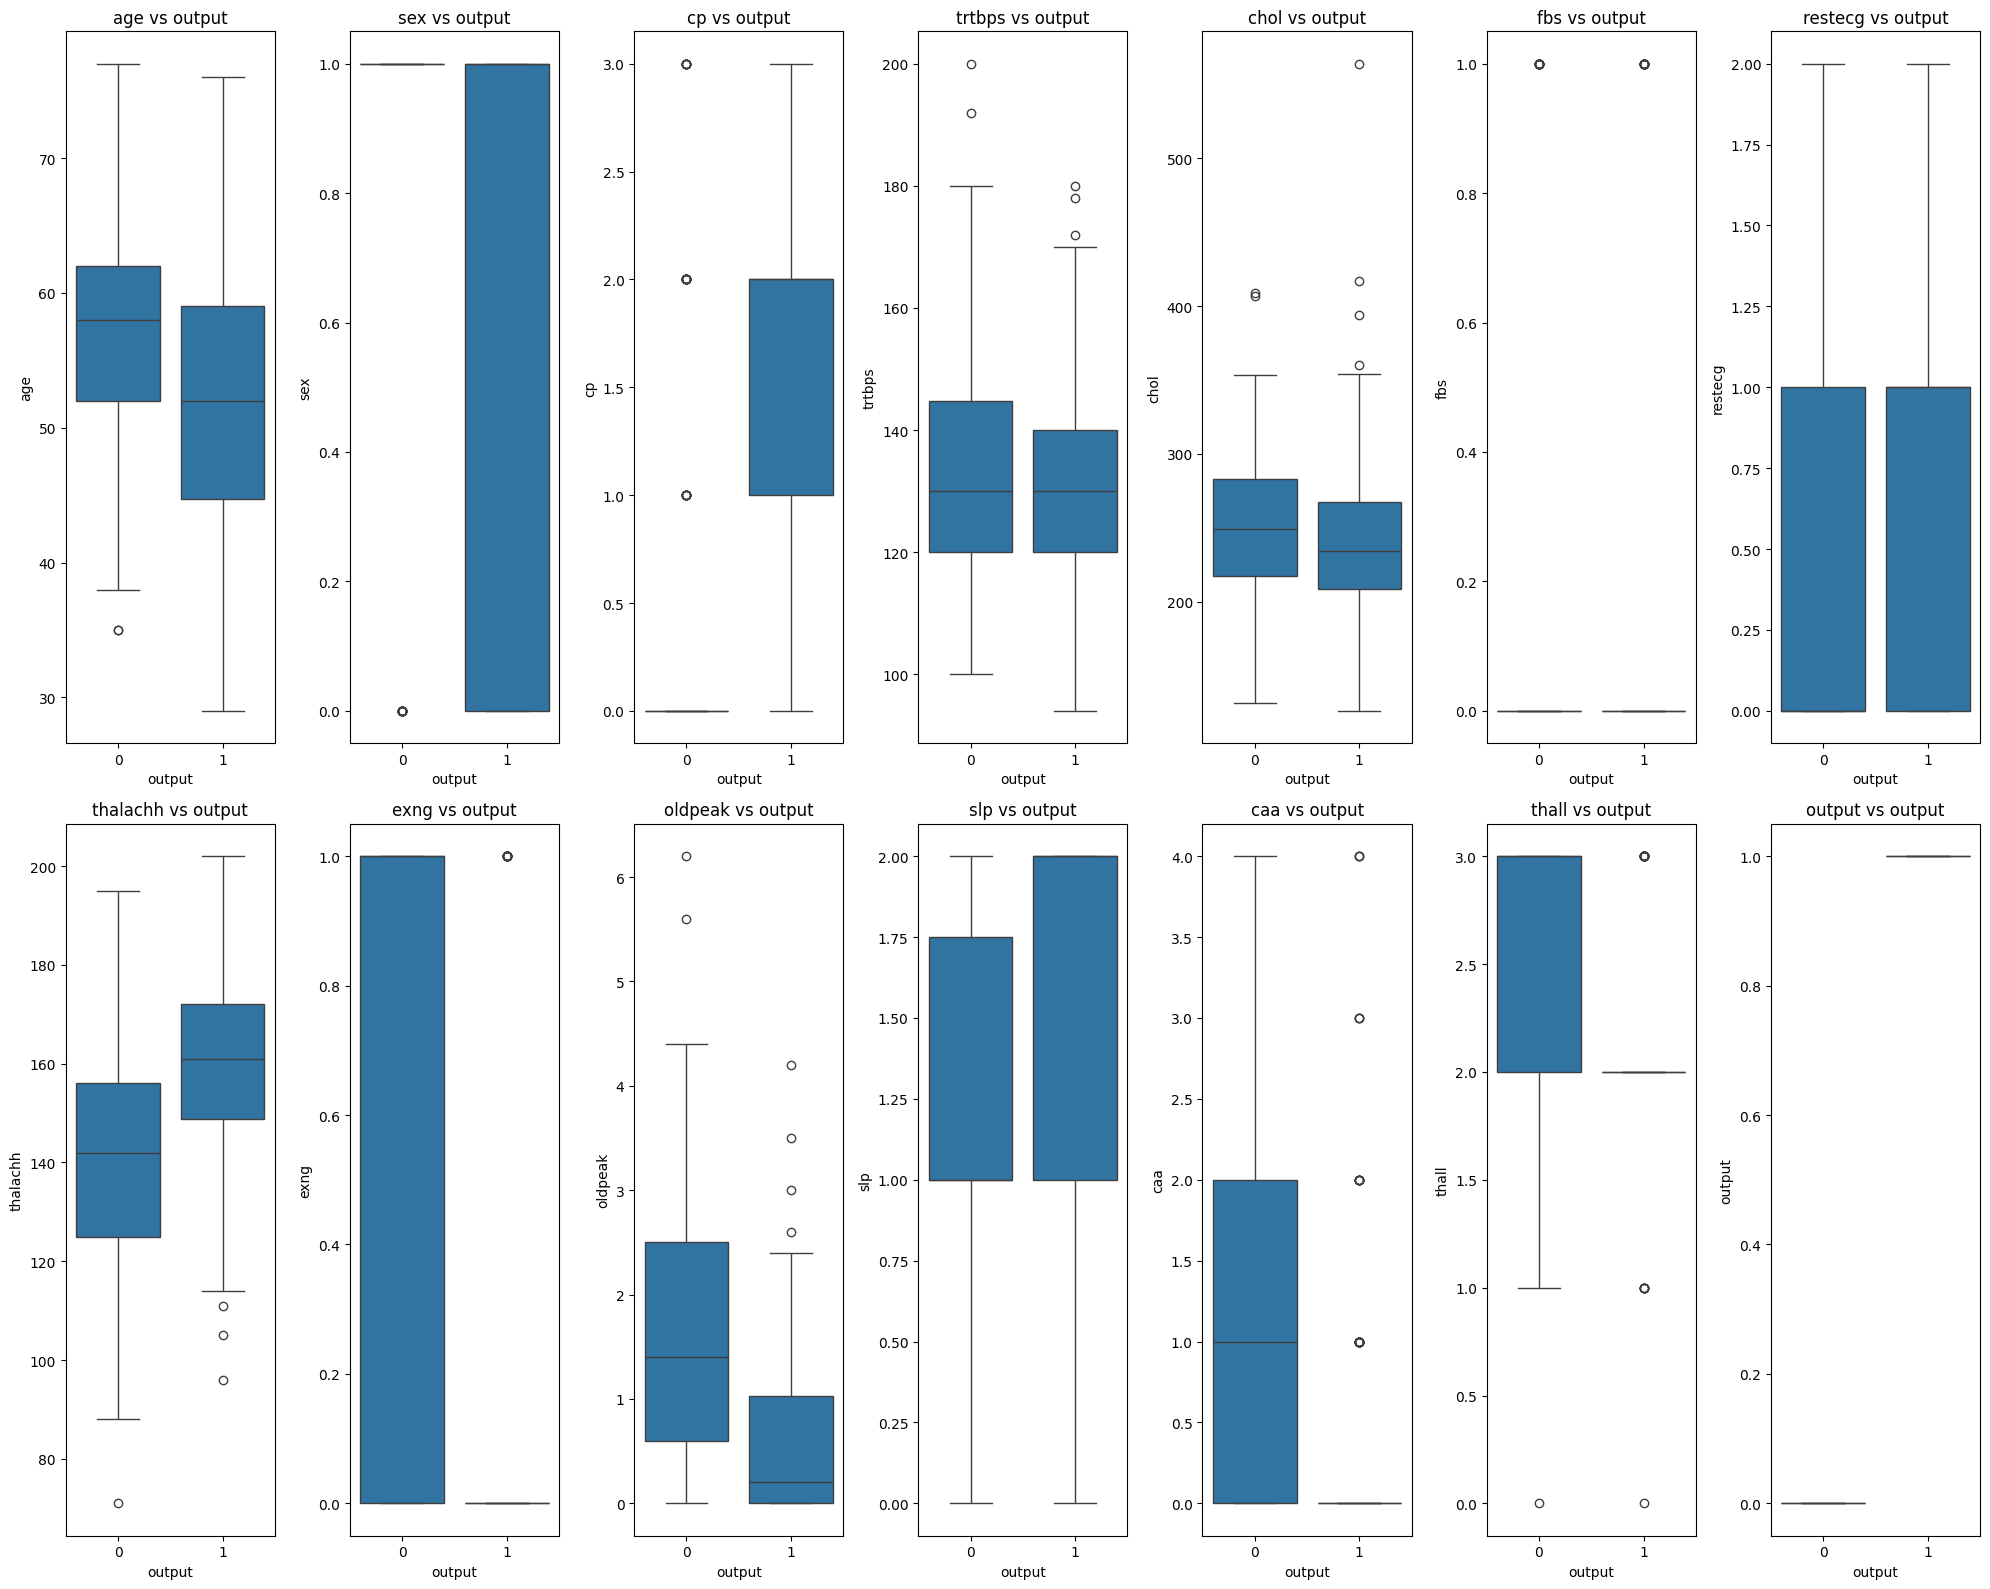

In [22]:
plt.figure(figsize=(20,16))

for i, col in enumerate(df.columns):
  plt.subplot(2,7,i+1)
  sns.boxplot(x='output', y=col, data=df)
  plt.title(f'{col} vs output')

plt.tight_layout()
plt.show()

<Axes: >

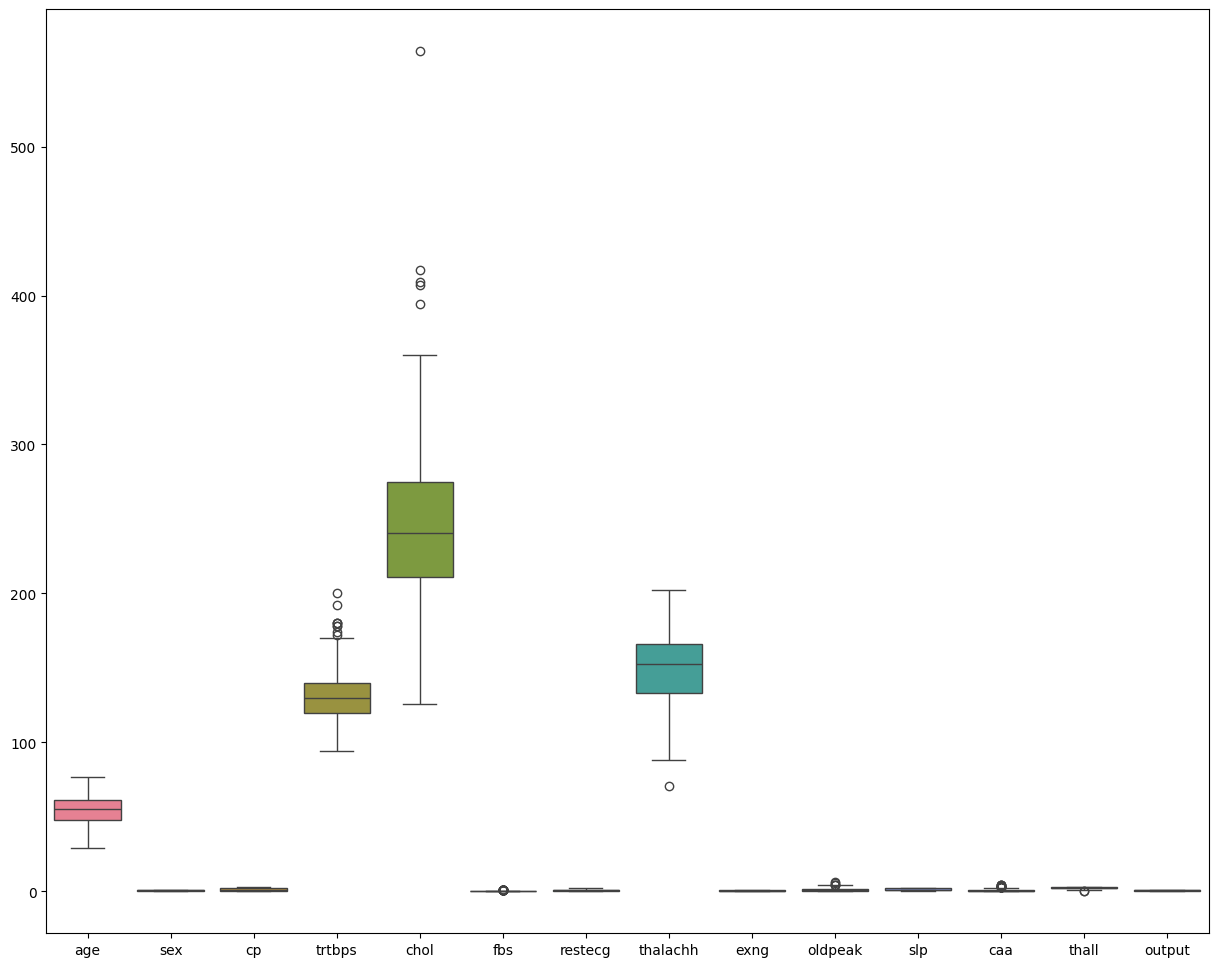

In [23]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

In [24]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in sex attribute : []
Outliers in cp attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in fbs attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in restecg attribute : []
Outliers in thalachh attribute : [71]
Outliers in exng attribute : []
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]
Outliers in slp attribute : []
Outliers in caa attribute : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
Outliers in thall attribute : [0, 0]
Outliers in output attribute : []


In [25]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in df:
    df[i]=handle_outliers(df[i])

<Axes: >

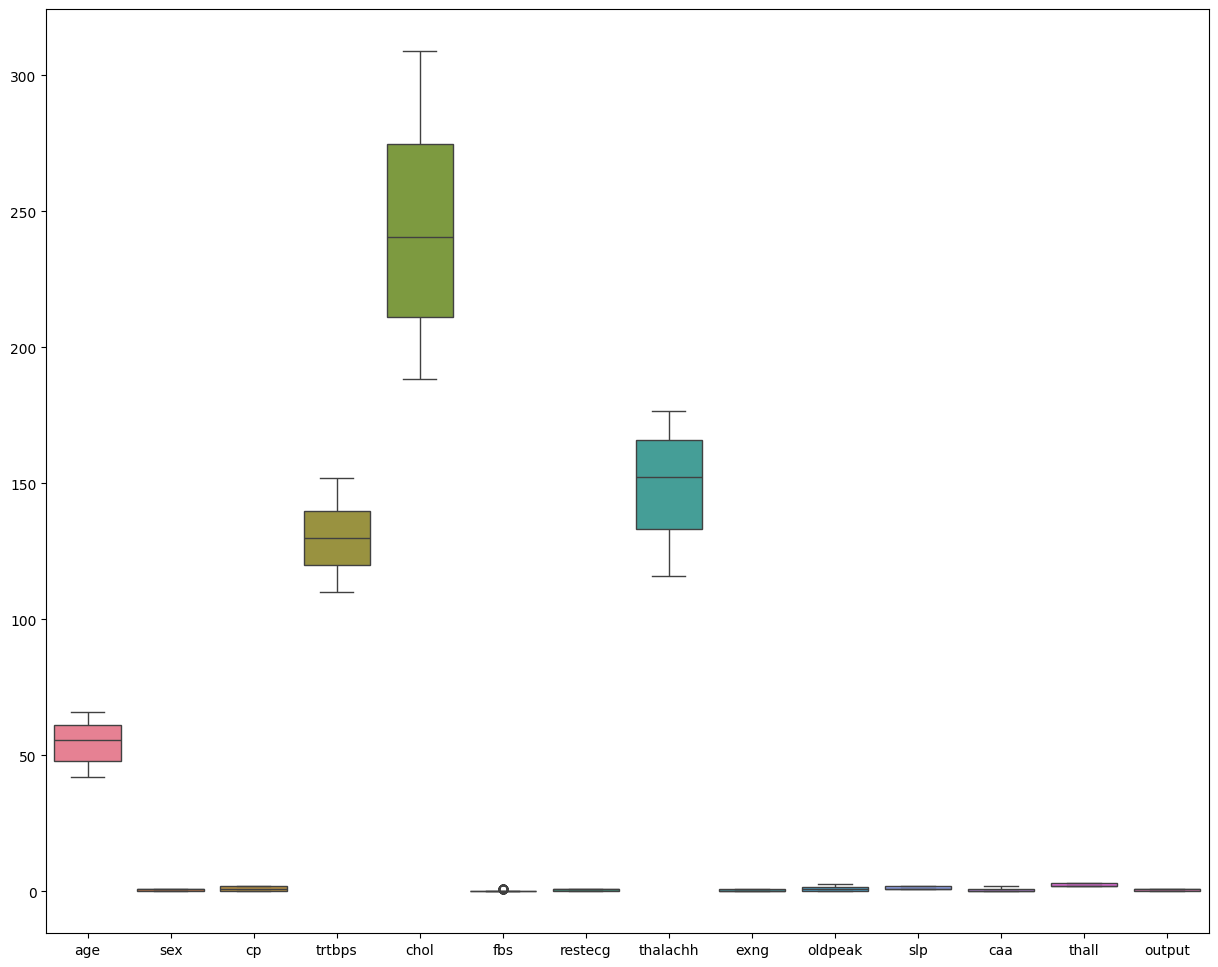

In [26]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

In [27]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in sex attribute : []
Outliers in cp attribute : []
Outliers in trtbps attribute : []
Outliers in chol attribute : []
Outliers in fbs attribute : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Outliers in restecg attribute : []
Outliers in thalachh attribute : []
Outliers in exng attribute : []
Outliers in oldpeak attribute : []
Outliers in slp attribute : []
Outliers in caa attribute : []
Outliers in thall attribute : []
Outliers in output attribute : []


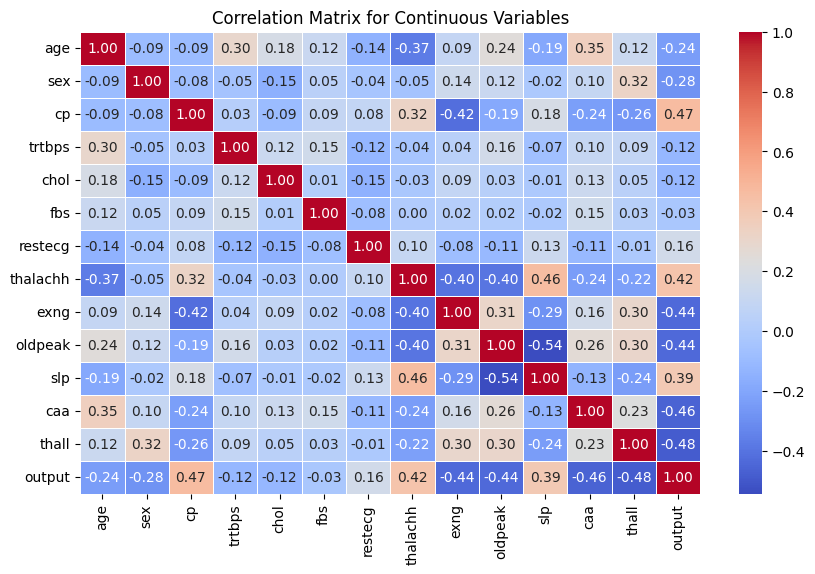

In [28]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

<Figure size 1000x800 with 0 Axes>

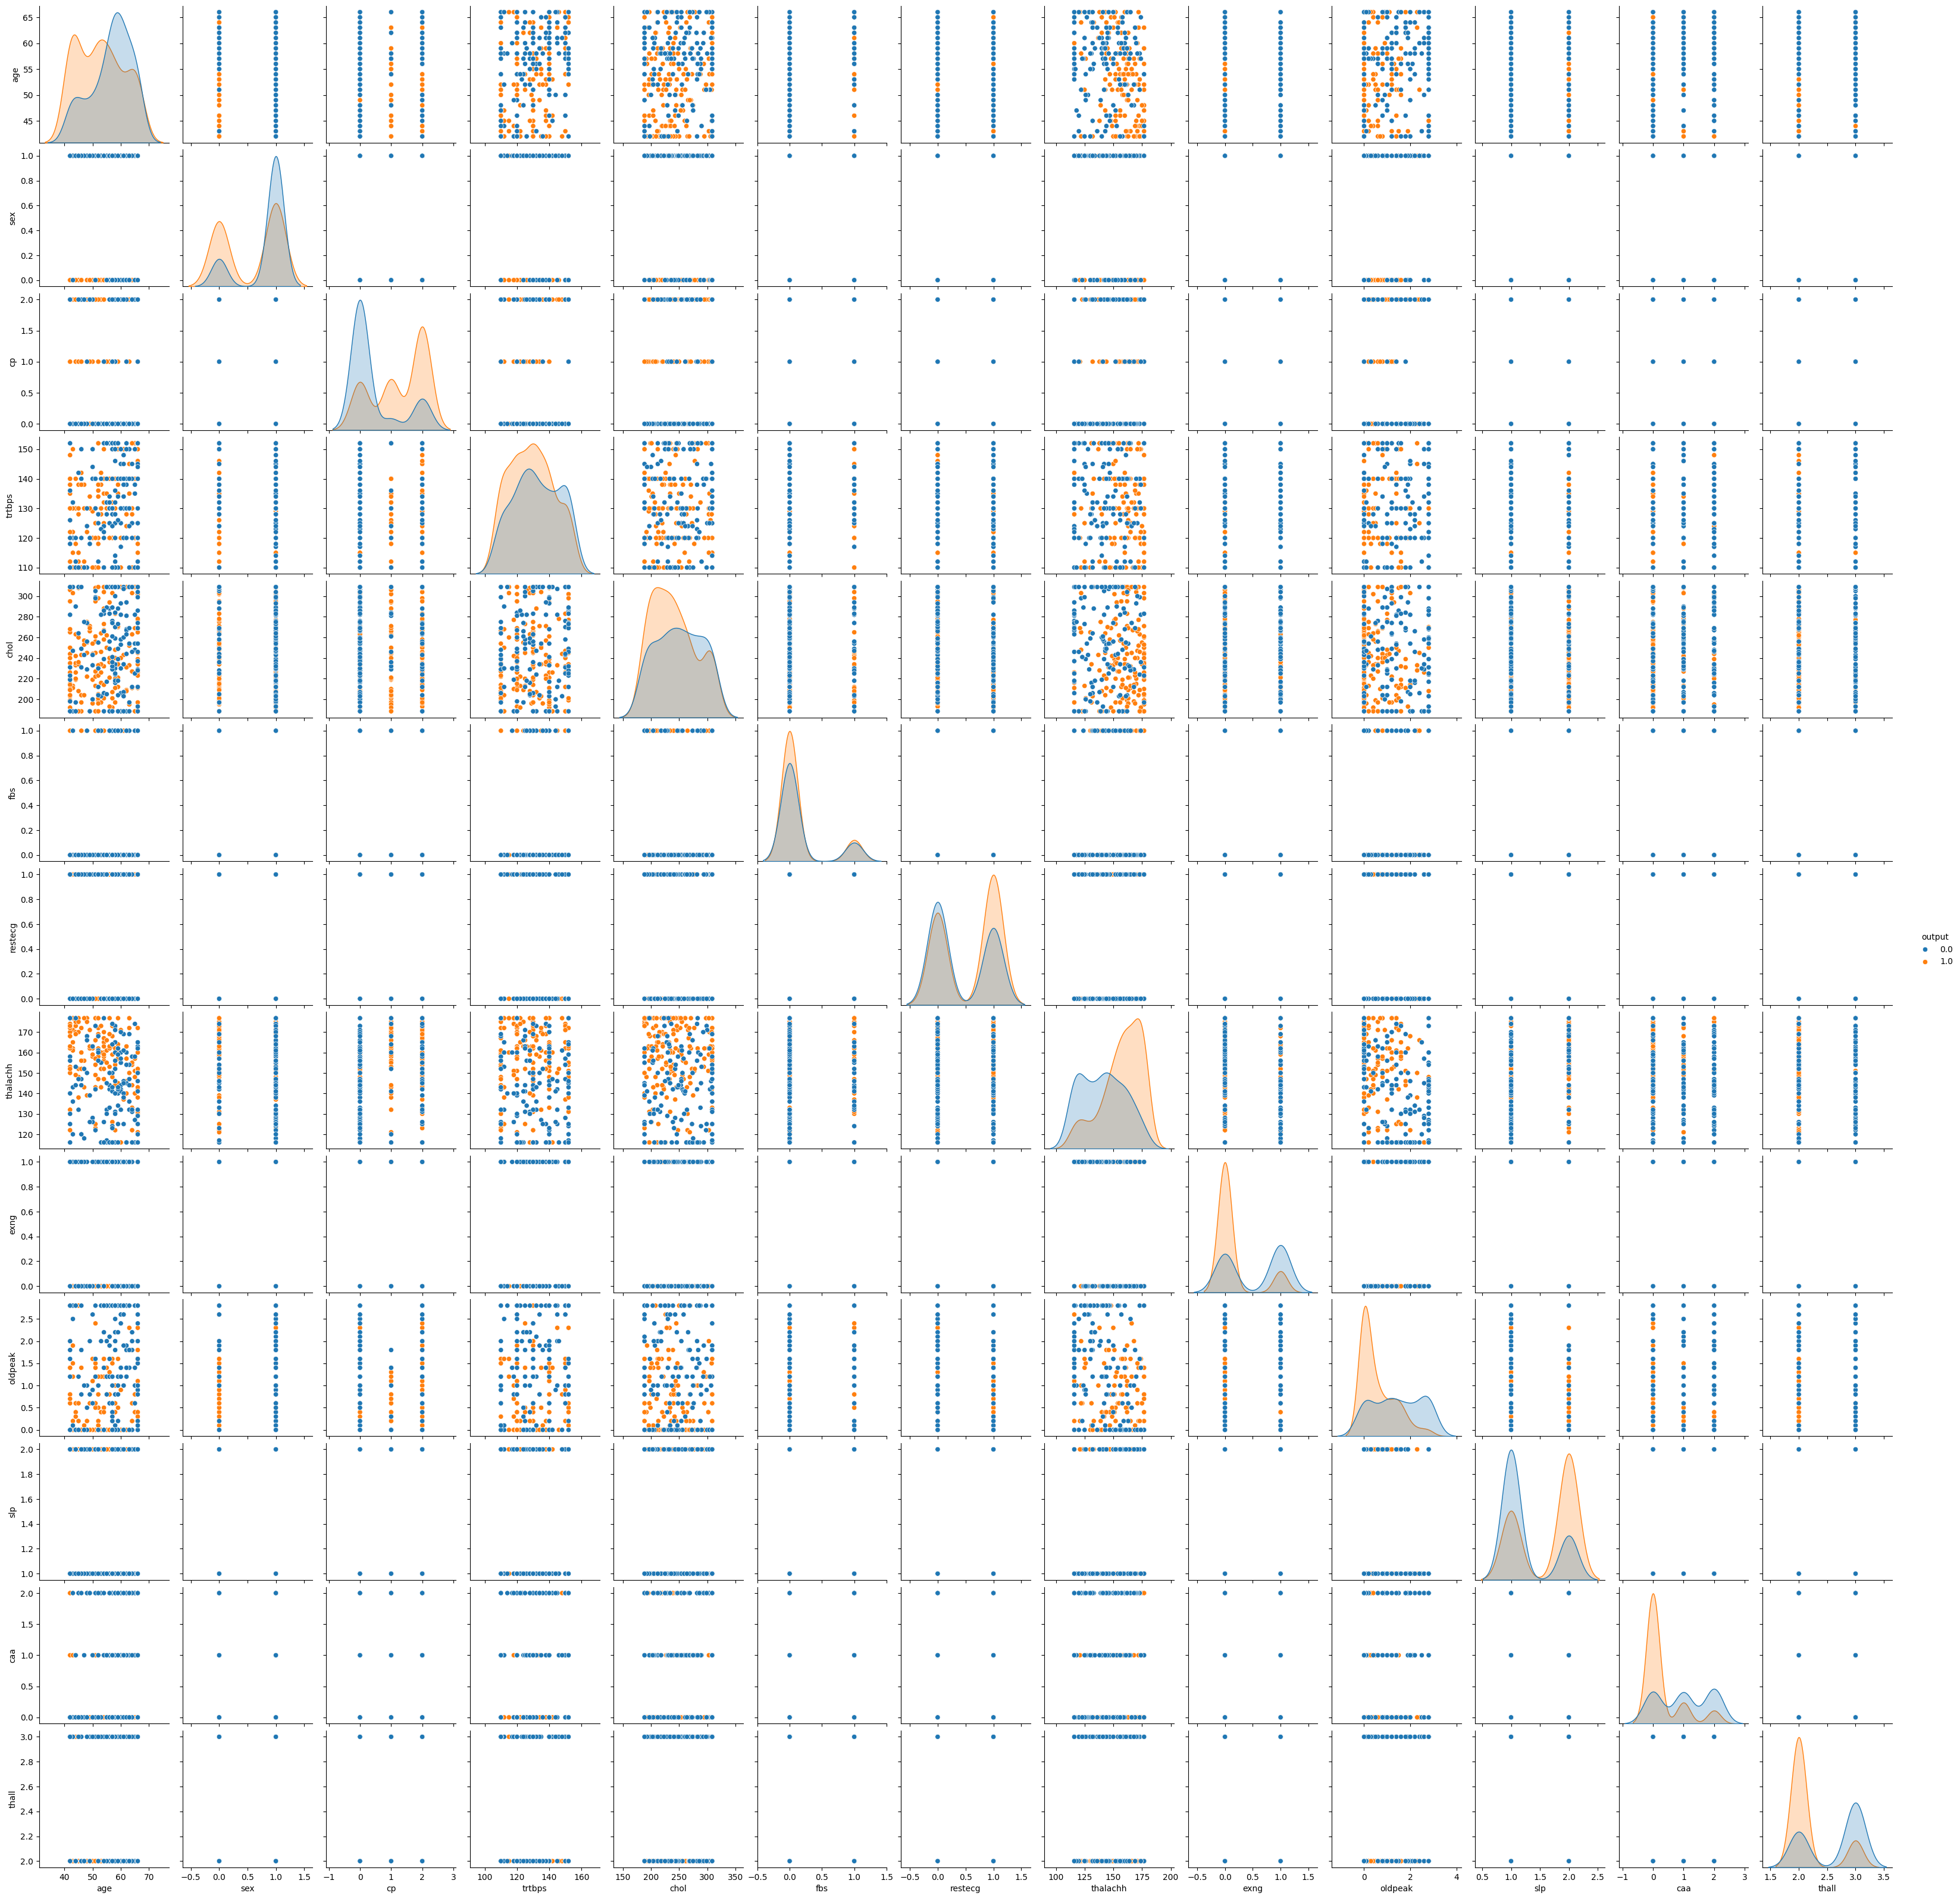

In [29]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='output')
plt.show()

# **PREPROCESSING**

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
# Update to drop 'output' instead of 'target'
X = df.drop('output', axis=1)
y = df['output']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **NAIVE-BAYES ALGORITHM**

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()

In [39]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [40]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

In [41]:
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb) * 100, "%")

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        29
         1.0       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Accuracy:  88.52459016393442 %


In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[27  2]
 [ 5 27]]


# **INFERENCE**-
## Using GaussianNB we get accuracy of **88.5%**

# **SVM MODEL**

In [44]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy:  0.8688524590163934


In [45]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[25  4]
 [ 4 28]]


# **INFERENCE**-
## Using Linear SVM we get accuracy of **86.8%**

# **HYPERPARAMETER TUNNG**
## SVM

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (for RBF kernel)
    'kernel': ['linear', 'rbf', 'sigmoid'],     # SVM kernel types
}


In [49]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)


In [50]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [51]:
grid_search.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [52]:
grid_search.best_estimator_

SVC(C=1, kernel='linear', random_state=42)

In [54]:
grid_search.best_score_

0.8549319727891156

In [55]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
# Predictions with the best model
y_pred_best_svm = best_model.predict(X_test)

# Evaluate the best model
print("Best SVM Classification Report:\n", classification_report(y_test, y_pred_best_svm))
print("Best Model Accuracy: ", accuracy_score(y_test, y_pred_best_svm))

Best SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Best Model Accuracy:  0.8688524590163934


# **INFERENCE**-
## After hyperparameter tuning there no not much improvement.